# Data loading
Dataset take from Kaggle
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset<br>
Load the "healthcare-dataset-stroke-data.csv" file into a pandas DataFrame.


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Inference: The dataset containing healthcare and stroke information has been successfully loaded into a pandas DataFrame, and the initial rows have been displayed to confirm the data is loaded correctly.

# Exploratory Data Analysis

Explore the loaded dataset to understand its characteristics.


In [118]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:")
print(df.info())

# Identify and count missing values
print("\nMissing Values:")
print(df.isnull().sum())


print("\nDuplicate Values:")
print(df.duplicated().sum())

Shape of the DataFrame: (5110, 12)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Missing Values:
id                     0
gender                 0
age                    0
hypertension

**Reasoning**:
Explore the dataset by checking its shape, data types, missing values, and distributions of key variables.



Plot Distribution of Numerical Features

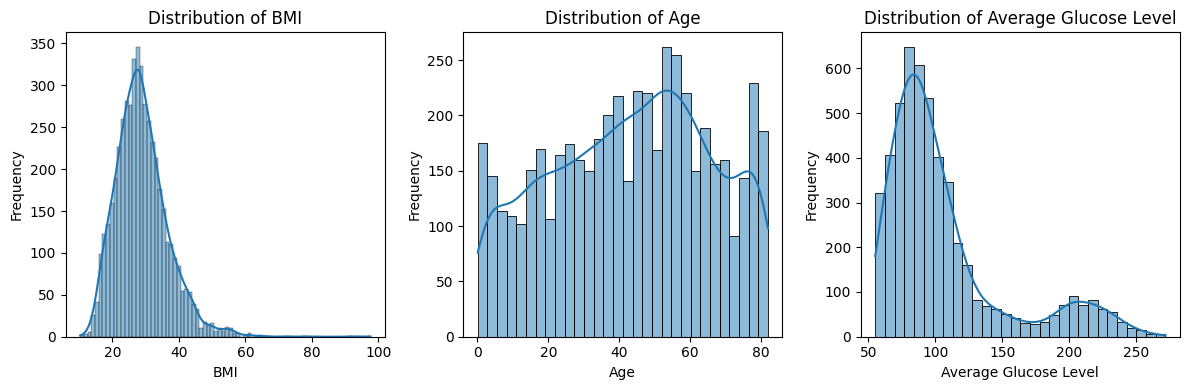

In [119]:
plt.figure(figsize=(12, 4))



plt.subplot(1,3,1)
#Distribution of BMI
sns.histplot(data=df, x='bmi', kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')


plt.subplot(1,3,2)
# Distribution of Age
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(1,3,3)
#Distribution of Glucose level
sns.histplot(data=df, x='avg_glucose_level', kde=True, bins=30)
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

Plotting Distribution of Categorical Features

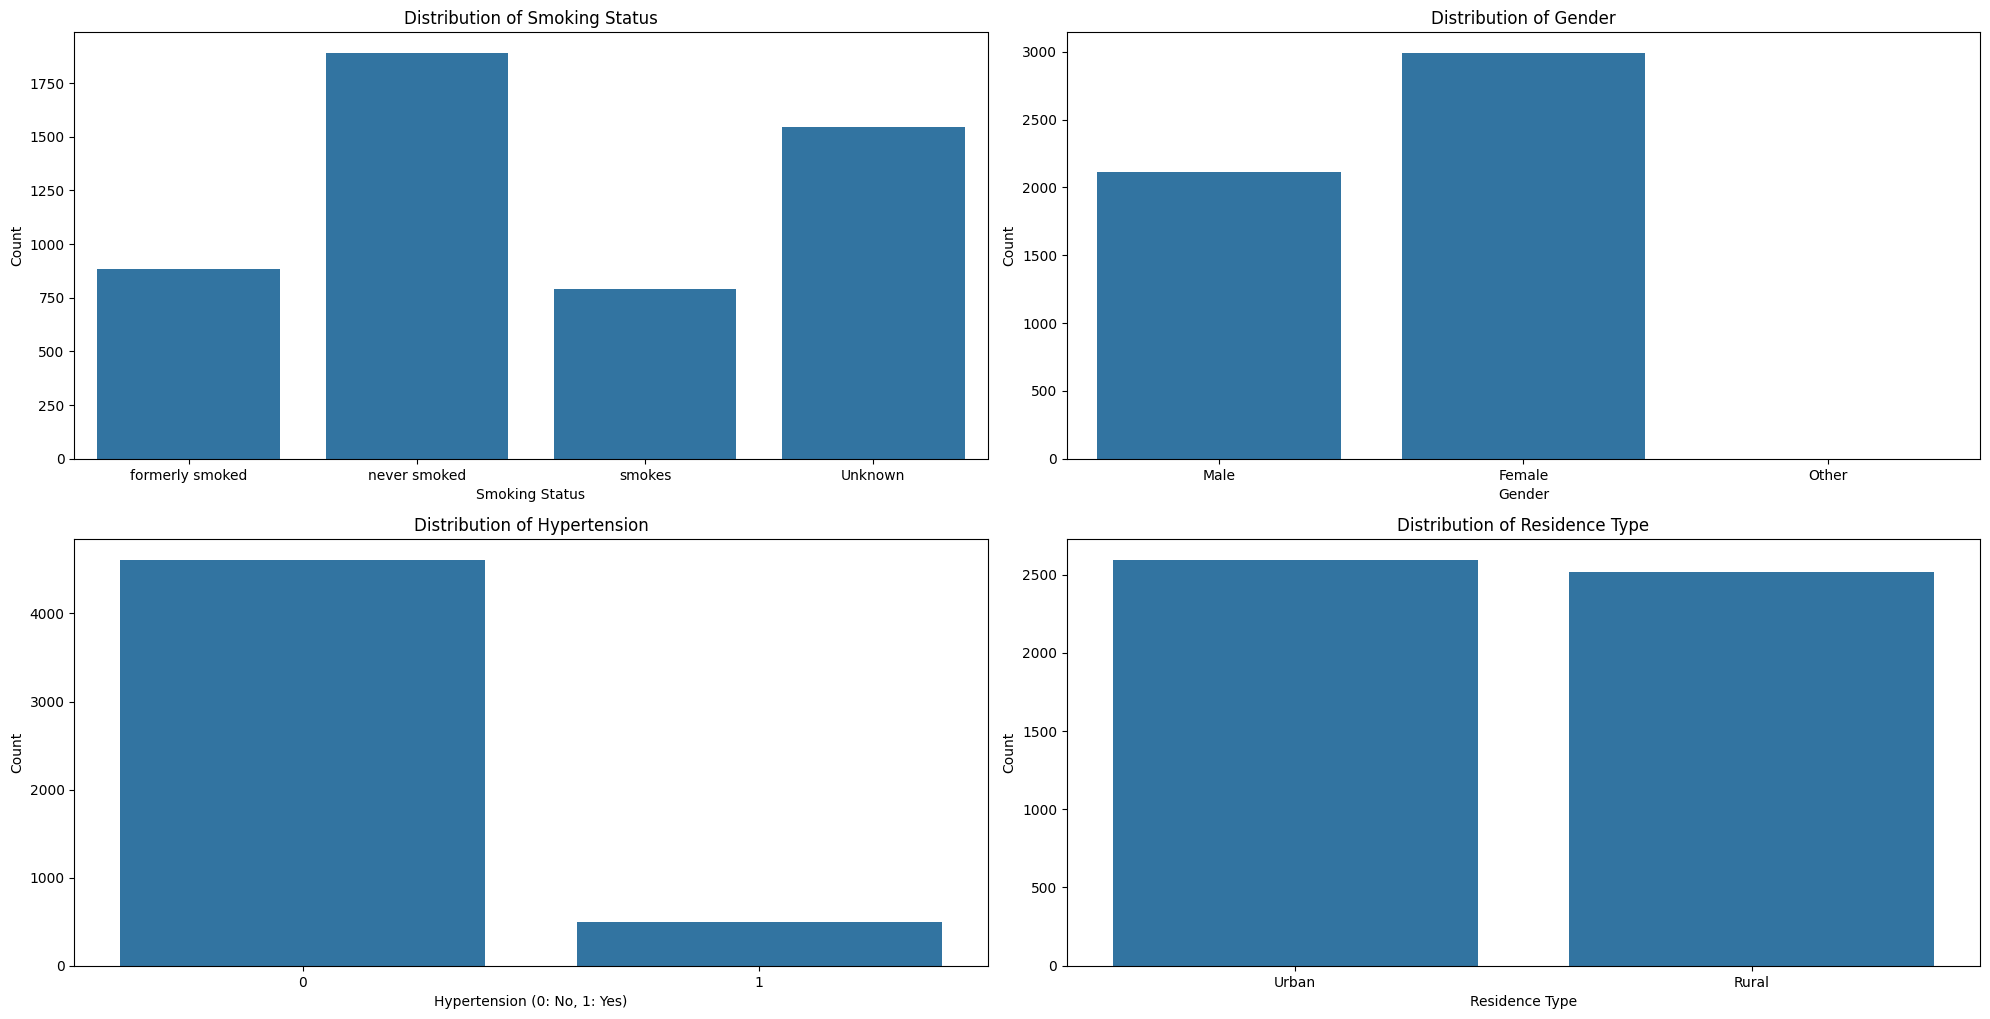

In [120]:



plt.figure(figsize=(20, 20))

# Distribution of Smoking Status
plt.subplot(4,2,1)
sns.countplot(data=df, x='smoking_status')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')


# Distribution of Gender

plt.subplot(4,2,2)
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Distribution of Hypertension

plt.subplot(4,2,3)
sns.countplot(data=df, x='hypertension')
plt.title('Distribution of Hypertension')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')

# Distribution of Residence Type

plt.subplot(4,2,4)
sns.countplot(data=df, x = 'Residence_type')
plt.title('Distribution of Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Data analysis

Analyze the relationship between features and the target variable ('stroke') and calculate descriptive statistics.


In [121]:
# Calculate descriptive statistics for numerical features grouped by 'stroke'
numerical_features = ['age', 'avg_glucose_level', 'bmi']
descriptive_stats = df.groupby('stroke')[numerical_features].agg(['mean', 'median', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
display(descriptive_stats)

# Analyze categorical features in relation to 'stroke'
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_features:
    stroke_rate = df.groupby(col)['stroke'].mean()
    print(f"\nStroke Rate by {col}:\n{stroke_rate}")


age                                                      \
             mean median        std   min   max <lambda_0> <lambda_1>   
stroke                                                                  
0       41.971545   43.0  22.291940  0.08  82.0       24.0       59.0   
1       67.728193   71.0  12.727419  1.32  82.0       59.0       78.0   

       avg_glucose_level                     ...                     \
                    mean  median        std  ...     max <lambda_0>   
stroke                                       ...                      
0             104.795513   91.47  43.846069  ...  267.76      77.12   
1             132.544739  105.22  61.921056  ...  271.74      79.79   

                         bmi                                          \
       <lambda_1>       mean median       std   min   max <lambda_0>   
stroke                                                                 
0          112.83  28.823064   28.0  7.908287  10.3  97.6       23.4   
1          196.71  30.471292   29.7  6.329452  16.9  56.6       26.4   

                   
       <lambda_1>  
stroke             
0            33.1  
1            33.7  

[2 rows x 21 columns]


Stroke Rate by gender:
gender
Female    0.047094
Male      0.051064
Other     0.000000
Name: stroke, dtype: float64

Stroke Rate by hypertension:
hypertension
0    0.039679
1    0.132530
Name: stroke, dtype: float64

Stroke Rate by heart_disease:
heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64

Stroke Rate by ever_married:
ever_married
No     0.016505
Yes    0.065613
Name: stroke, dtype: float64

Stroke Rate by work_type:
work_type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050940
Self-employed    0.079365
children         0.002911
Name: stroke, dtype: float64

Stroke Rate by Residence_type:
Residence_type
Rural    0.045346
Urban    0.052003
Name: stroke, dtype: float64

Stroke Rate by smoking_status:
smoking_status
Unknown            0.030440
formerly smoked    0.079096
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64



### Analyze the impact of missing 'bmi' values

In [122]:

missing_bmi_stroke_rate = df[df['bmi'].isnull()]['stroke'].mean()
available_bmi_stroke_rate = df[df['bmi'].notnull()]['stroke'].mean()
print(f"\nStroke Rate with missing 'bmi': {missing_bmi_stroke_rate}")
print(f"Stroke Rate with available 'bmi': {available_bmi_stroke_rate}")


Stroke Rate with missing 'bmi': 0.19900497512437812
Stroke Rate with available 'bmi': 0.04257486249745366


###Inference:
Stroke rate is much Higher in missign BMI data

###Analyzing distributution using BoxPlot


<ipython-input-123-a910578efb04>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette="Set2")
<ipython-input-123-a910578efb04>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette="Set2")
<ipython-input-123-a910578efb04>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=df, palette="Set2")


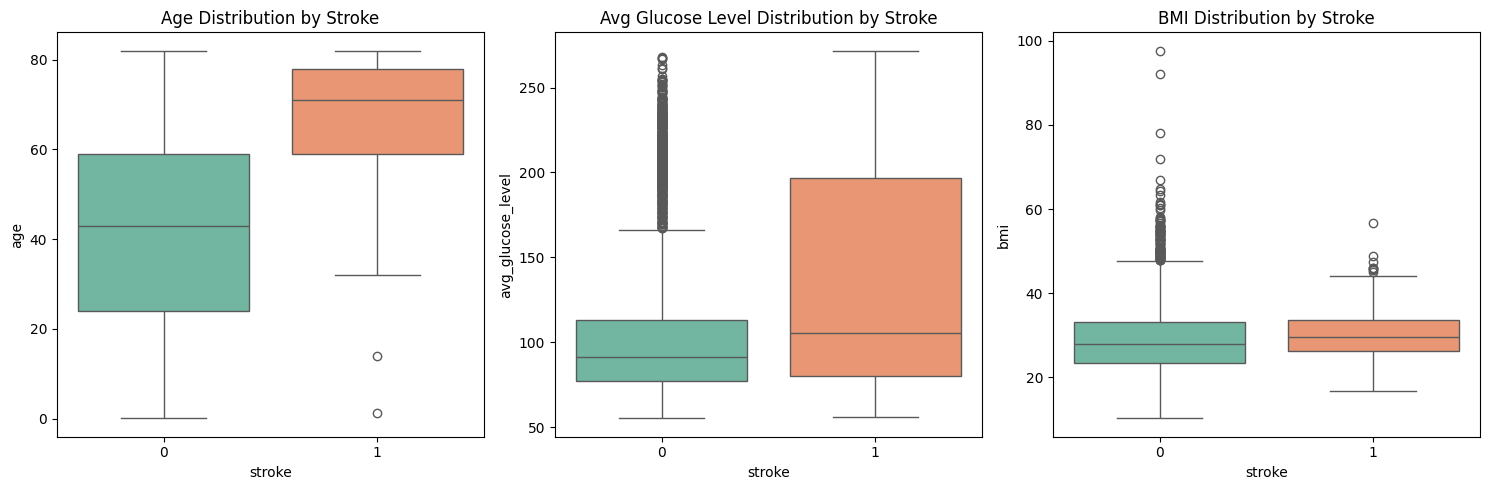

In [123]:
# Box plots for numerical features grouped by 'stroke'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='stroke', y='age', data=df, palette="Set2")
plt.title('Age Distribution by Stroke')

plt.subplot(1, 3, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette="Set2")
plt.title('Avg Glucose Level Distribution by Stroke')

plt.subplot(1, 3, 3)
sns.boxplot(x='stroke', y='bmi', data=df, palette="Set2")
plt.title('BMI Distribution by Stroke')
plt.tight_layout()
plt.show()



### Heatmap for correlation between numerical variables and 'stroke'

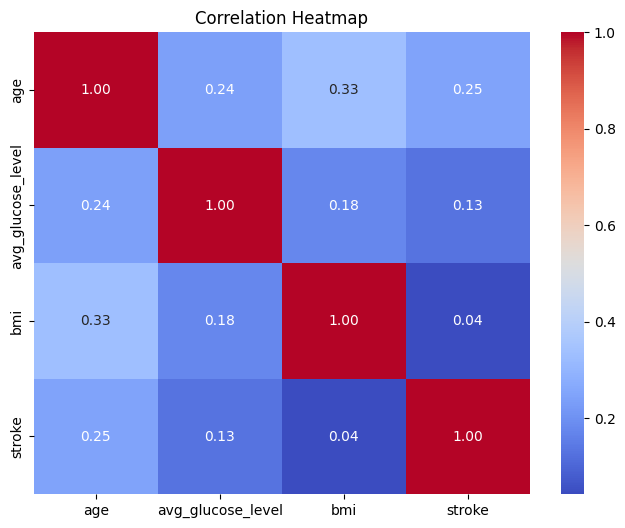

In [124]:


plt.figure(figsize=(8, 6))
df['stroke'] = df['stroke'].astype(int)  # Convert 'stroke' to numerical
corr_matrix = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Inferences:**

*   **Data Structure and Types:** The dataset contains 5110 rows and 12 columns. There's a mix of numerical and categorical data types. The initial look at `df.info()` also indicates that the 'bmi' column has missing values.
*   **Missing and Duplicate Values:** The analysis confirms that only the 'bmi' column has missing values (201 of them). There are no duplicate rows in the dataset.
*   **Distribution of Numerical Features:** The histograms and KDE plots show the distributions of age, average glucose level, and BMI. Age and average glucose level appear to have some skewing, while BMI seems more normally distributed (though the presence of missing values and later outlier removal will impact this).
*   **Distribution of Categorical Features:** Count plots visualize the frequency of different categories within features like smoking status, gender, hypertension, and residence type. This highlights the distribution of these characteristics within the dataset, and notable imbalances in categories like hypertension (mostly 0) and the "Other" gender category (very low count).
*   **Descriptive Statistics and Stroke Relationship:** Analyzing descriptive statistics for numerical features grouped by 'stroke' reveals that individuals who had a stroke tend to have higher mean and median values for age, average glucose level, and BMI compared to those who did not. Examining stroke rates across categorical features shows that stroke risk varies significantly based on categories like hypertension (higher risk if present), heart disease (higher risk if present), and ever married status (potentially higher risk if married).

*   **Missing BMI Impact on Stroke Rate:** The analysis shows that the stroke rate is significantly higher among individuals with missing 'bmi' values compared to those with available 'bmi'. This is a crucial finding, suggesting that rows with missing BMI are not missing randomly and that simply imputing with the overall mean or median might introduce bias.
*   **Numerical Feature Distribution by Stroke:** Box plots visually confirm the trend observed in descriptive statistics: individuals who had a stroke tend to have higher values for age, average glucose level, and BMI, as indicated by the higher median and wider distribution of these features in the stroke group (stroke=1).
*   **Correlation Heatmap:** The heatmap quantifies the linear relationships between the numerical features and 'stroke'. It confirms a positive correlation between age and stroke, average glucose level and stroke, and BMI and stroke. Age and average glucose level appear to have stronger positive correlations with stroke than BMI.


**Insights or Next Steps**
* Address the missing 'bmi' values through imputation or removal, carefully considering the potential impact on the analysis.
* Explore more advanced statistical methods and machine learning models to predict stroke risk, taking into account the class imbalance in the dataset.



#Data Preprocessing

Since BMI is only column with missing values, we will impute the values in it.

In [125]:
missing_bmi_stroke_rate = df[df['bmi'].isnull()]['stroke'].mean()
available_bmi_stroke_rate = df[df['bmi'].notnull()]['stroke'].mean()
print(f"\nStroke Rate with missing 'bmi': {missing_bmi_stroke_rate}")
print(f"Stroke Rate with available 'bmi': {available_bmi_stroke_rate}")


Stroke Rate with missing 'bmi': 0.19900497512437812
Stroke Rate with available 'bmi': 0.04257486249745366


Stroke rate is much Higher for missing BMI data so we cannot impute columns with median or mean.

###Checking distribution for Stroke Status

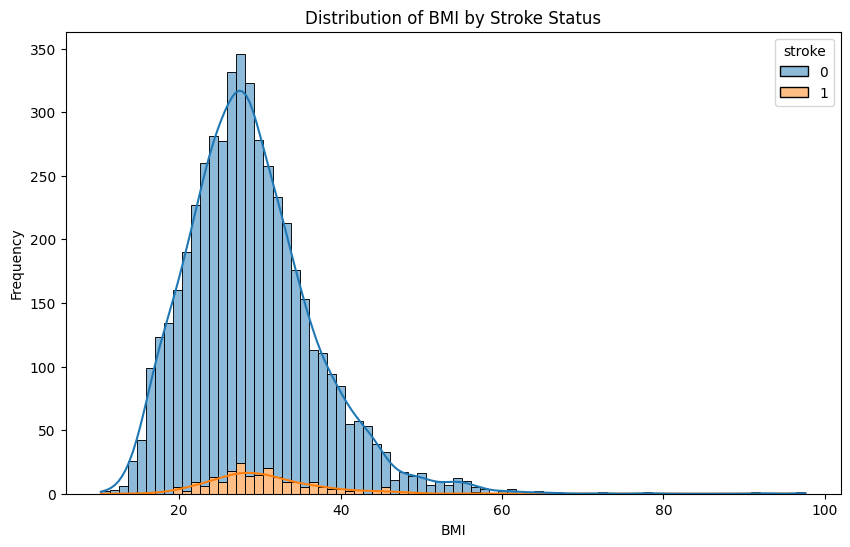

In [126]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi',hue = 'stroke', kde=True, multiple="stack")
plt.title('Distribution of BMI by Stroke Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Since distribution is skewed we could use median to impute the misssing values but Stroke varies too much for missing values.

### So We will use Linear Regression Model for imputing missing values using other features.

We will also add extra feature with considering missing data for better prediction.

In [127]:

from sklearn.linear_model import LinearRegression

# Step 1: Create a copy and the bmi_missing column
df = df.copy()
df['bmi_missing'] = df['bmi'].isna().astype(int)

# Step 2: Select features for regression imputation (excluding 'stroke' to avoid leakage)
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'gender', 'smoking_status']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[features + ['bmi']], drop_first=True)
print(df_encoded.head())
# Separate rows with and without BMI
df_with_bmi = df_encoded[df_encoded['bmi'].notna()]
df_missing_bmi = df_encoded[df_encoded['bmi'].isna()].drop(columns=['bmi'])

# Step 3: Train a regression model to predict BMI
y_train = df_with_bmi['bmi']
X_train = df_with_bmi.drop(columns=['bmi'])

print(y_train)
print(X_train)
reg = LinearRegression()
reg.fit(X_train, y_train)

# Step 4: Predict missing BMI
bmi_pred = reg.predict(df_missing_bmi)

# Step 5: Fill in predicted BMI values
df.loc[df['bmi'].isna(), 'bmi'] = bmi_pred

# Step 6: (Optional fallback) Fill any remaining NaNs with overall median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


    age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
0  67.0             0              1             228.69  36.6         True   
1  61.0             0              0             202.21   NaN        False   
2  80.0             0              1             105.92  32.5         True   
3  49.0             0              0             171.23  34.4        False   
4  79.0             1              0             174.12  24.0        False   

   gender_Other  smoking_status_formerly smoked  smoking_status_never smoked  \
0         False                            True                        False   
1         False                           False                         True   
2         False                           False                         True   
3         False                           False                        False   
4         False                           False                         True   

   smoking_status_smokes  
0                  Fals

In [128]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


##Removing outliers from BMI column.

In [129]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

x = Q1 - 2.5 * IQR
y = Q3 + 2.5 * IQR

outliers = df[(df['bmi'] < x) | (df['bmi'] > y)]
outliers
outliers.shape

(23, 13)

In [130]:
df = df[(df['bmi'] >= x) & (df['bmi'] <= y)]
print("Shape of DataFrame after removing outliers in BMI:", df.shape)

Shape of DataFrame after removing outliers in BMI: (5087, 13)


###Checking Distribution after outlier removal

<ipython-input-131-155c0e29ea2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=df, palette="Set2")


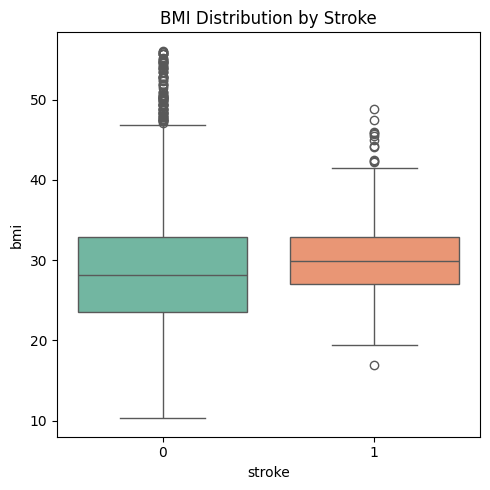

In [131]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='stroke', y='bmi', data=df, palette="Set2")
plt.title('BMI Distribution by Stroke')
plt.tight_layout()
plt.show()

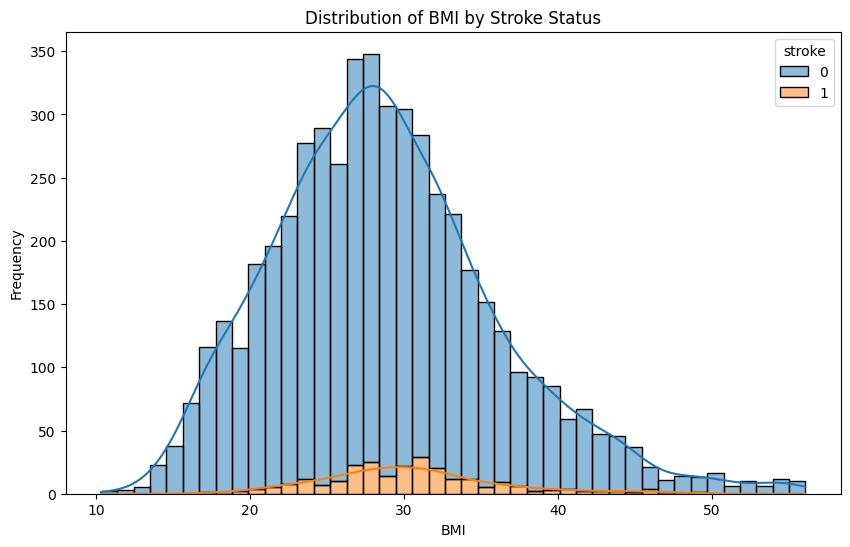

In [132]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi',hue = 'stroke', kde=True, multiple="stack")
plt.title('Distribution of BMI by Stroke Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

*Inferences:**

*   **Missing BMI Handling Strategy:** The decision to use regression imputation for missing 'bmi' values is justified by the observation that the stroke rate is significantly higher in the missing BMI group, indicating that a simple mean or median imputation would be inappropriate.
*   **Regression Imputation Implementation:** A linear regression model was successfully trained on available data to predict BMI based on other features. The missing BMI values were then imputed using these predictions. An additional feature `bmi_missing` was created to capture information about whether the original BMI was missing, which could be useful for the model.
*   **Outlier Removal:** Outliers in the imputed 'bmi' column were identified and removed based on the 2.5\*IQR rule. This step aims to prevent extreme values from unduly influencing the machine learning models.
*   **Impact of Preprocessing on BMI Distribution:** The box plot and histogram after outlier removal show that the 'bmi' distribution is now tighter, and the extreme outliers have been removed, resulting in a potentially more robust distribution for modeling.



#Machine Learning Implementation

##Processing Data

In [133]:
df.dtypes
object_cols  = df.select_dtypes(include='object').columns
for col in object_cols:
  print(f"\nUnique values in '{col}':")
  print(df[col].unique())
  print(df[col].value_counts())


Unique values in 'gender':
['Male' 'Female' 'Other']
gender
Female    2980
Male      2106
Other        1
Name: count, dtype: int64

Unique values in 'ever_married':
['Yes' 'No']
ever_married
Yes    3333
No     1754
Name: count, dtype: int64

Unique values in 'work_type':
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
work_type
Private          2907
Self-employed     816
children          687
Govt_job          655
Never_worked       22
Name: count, dtype: int64

Unique values in 'Residence_type':
['Urban' 'Rural']
Residence_type
Urban    2587
Rural    2500
Name: count, dtype: int64

Unique values in 'smoking_status':
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
smoking_status
never smoked       1878
Unknown            1539
formerly smoked     885
smokes              785
Name: count, dtype: int64


###Since other count is 1 so we can remove it.

In [134]:

df = df[df['gender'] != 'Other']
print("\nGender Distribution after dropping 'Other':")
print(df['gender'].value_counts())


Gender Distribution after dropping 'Other':
gender
Female    2980
Male      2106
Name: count, dtype: int64


###Encoding categorical columns

In [135]:
df_encoded = df.copy()
for col in object_cols:
  df_encoded[col] = df_encoded[col].astype('category')
  df_encoded[col] = df_encoded[col].cat.codes

df_encoded

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_missing
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,0
1,51676,0,61.0,0,0,1,3,0,202.21,32.833838,2,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,0
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,0
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,34.195645,2,0,1
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0,0


##Training and Testing Model

We will test using three models:
Logistic Regression
Random Forest Classifier
XGBoost Classifier

We will also use SMOTE (Synthetic Minority Oversampling Technique) since data is class imbalanced.

In [136]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [137]:
X = df_encoded.drop(['id','stroke'], axis=1)
y = df_encoded['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [138]:

model1 = LogisticRegression(C = 0.1, class_weight='balanced')
model2 = RandomForestClassifier(n_estimators=100, max_depth = 7, min_samples_leaf= 2, min_samples_split=5 )
# Count positives and negatives
neg = np.sum(y == 0)
pos = np.sum(y == 1)

# Calculate weight
spw = neg / pos

model3 = xgb.XGBClassifier(scale_pos_weight=spw, n_estimators=100, max_depth = 7, learning_rate = 0.05 )

model1.fit(X_train_sm, y_train_sm)
model2.fit(X_train_sm, y_train_sm)
model3.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

###Testing accuracy and other parameter using Classification Report, Confusion Matrix and ROC_AUC Score for classification Model

In [140]:
cfr1 = classification_report(y_test, y_pred1)
cfr2 = classification_report(y_test, y_pred2)
cfr3 = classification_report(y_test, y_pred3)

print("\nClassification Report of Model 1:\n", cfr1)
print("\nClassification Report of Model 2:\n", cfr2)
print("\nClassification Report of Model 3:\n", cfr3)

cfm1 = confusion_matrix(y_test, y_pred1)
cfm2 = confusion_matrix(y_test, y_pred2)
cfm3 = confusion_matrix(y_test, y_pred3)

print("\nConfusion Matrix of Model 1:\n", cfm1)
print("\nConfusion Matrix of Model 2:\n", cfm2)
print("\nConfusion Matrix of Model 3:\n", cfm3)

roc1 = roc_auc_score(y_test, y_pred1)
roc2 = roc_auc_score(y_test, y_pred2)
roc3 = roc_auc_score(y_test, y_pred3)

print("ROC AUC Score of Model 1:", roc1)
print("ROC AUC Score of Model 2:", roc2)
print("ROC AUC Score of Model 3:", roc3)


Classification Report of Model 1:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       958
           1       0.15      0.60      0.25        60

    accuracy                           0.78      1018
   macro avg       0.56      0.70      0.56      1018
weighted avg       0.92      0.78      0.84      1018


Classification Report of Model 2:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       958
           1       0.17      0.57      0.26        60

    accuracy                           0.81      1018
   macro avg       0.57      0.70      0.58      1018
weighted avg       0.92      0.81      0.85      1018


Classification Report of Model 3:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       958
           1       0.14      0.63      0.23        60

    accuracy                           0.75      1018
   macro avg       0

Inference: Out of three Random Forst Classifier performs best with good precision, recall and ROC_AUC score so we will dive deeper to understand the model.

##Understanding Relationship and weights of features in prediction.

We will use SHAP explainer to undestand impact of feature and data points

###Summary plot shows which features are most important for the model's predictions and how their values impact the predicted stroke probability (positive or negative contribution).

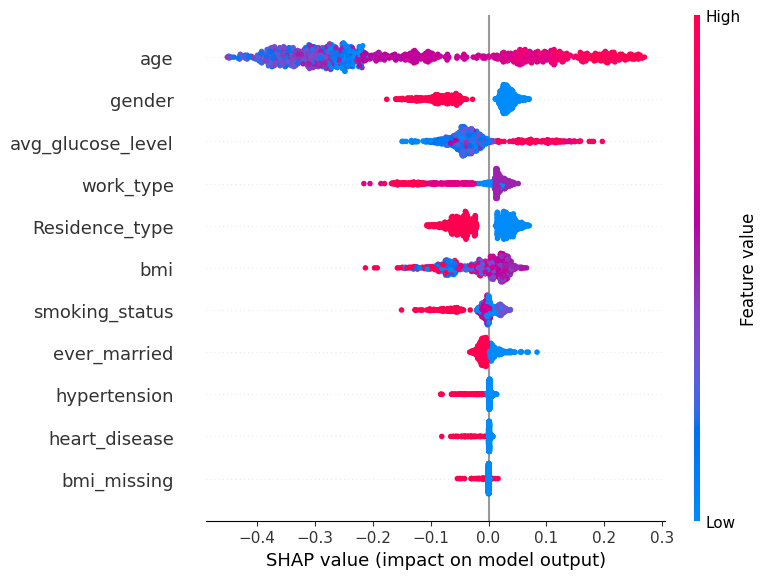

In [141]:
import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(model2)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values[:,:,1], X_test)

###Dependence plot illustrates the relationship between a single feature and its contribution to the prediction, and how this relationship can change depending on the value of another interacting feature (e.g., how age's impact on stroke prediction varies with glucose level).

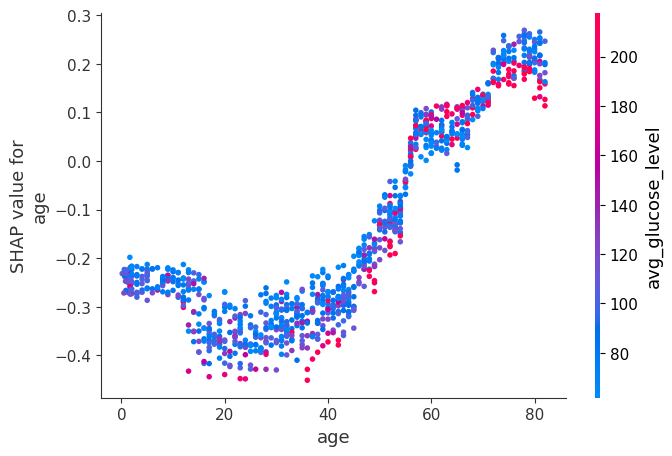

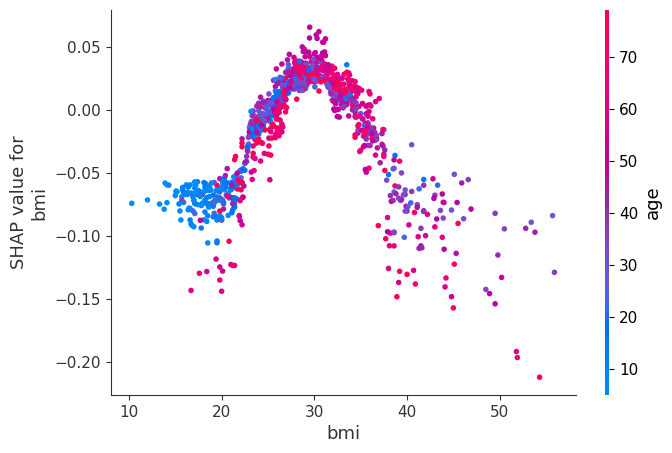

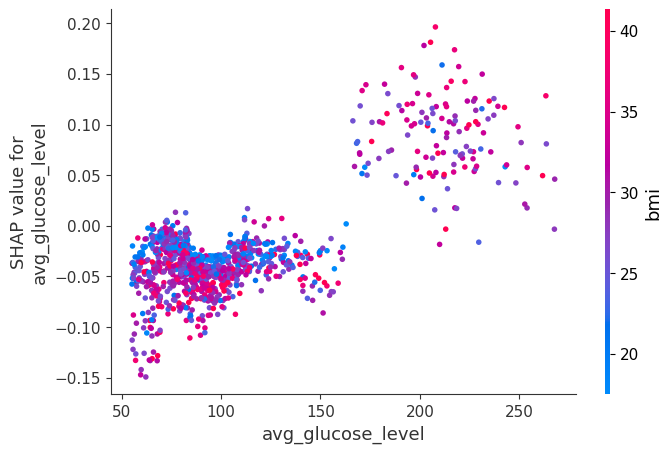

In [142]:
shap.dependence_plot("age", shap_values[:,:,1], X_test, interaction_index="avg_glucose_level")

shap.dependence_plot("bmi", shap_values[:,:,1], X_test, interaction_index="age")

shap.dependence_plot("avg_glucose_level", shap_values[:,:,1], X_test, interaction_index="bmi")



We will also check Feature importance for other models also

In [143]:
print("\nFeature Importance for Logistic Regression (Model 1):")
feature_importance_lr = pd.DataFrame({'feature': X.columns, 'importance': model1.coef_[0]})
feature_importance_lr = feature_importance_lr.sort_values('importance', ascending=False)
feature_importance_lr


Feature Importance for Logistic Regression (Model 1):


,feature,importance
1,age,0.090546
7,avg_glucose_level,0.009239
8,bmi,-0.014692
10,bmi_missing,-0.200265
9,smoking_status,-0.210160
5,work_type,-0.241795
0,gender,-0.784060
3,heart_disease,-1.063449
2,hypertension,-1.079305
6,Residence_type,-1.151953


In [144]:
print("\nFeature Importance for Random Forest (Model 2):")
feature_importance_rf = pd.DataFrame({'feature': X.columns, 'importance': model2.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)
feature_importance_rf


Feature Importance for Random Forest (Model 2):


,feature,importance
1,age,0.526698
7,avg_glucose_level,0.141594
5,work_type,0.083617
8,bmi,0.081910
0,gender,0.055046
6,Residence_type,0.040995
9,smoking_status,0.033672
4,ever_married,0.019503
2,hypertension,0.007957
3,heart_disease,0.006318


In [145]:
print("\nFeature Importance for XGBoost (Model 3):")
feature_importance_xgb = pd.DataFrame({'feature': X.columns, 'importance': model3.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values('importance', ascending=False)
feature_importance_xgb


Feature Importance for XGBoost (Model 3):


,feature,importance
1,age,0.242148
0,gender,0.124312
7,avg_glucose_level,0.109513
4,ever_married,0.092405
8,bmi,0.082576
5,work_type,0.072545
6,Residence_type,0.068317
3,heart_disease,0.064042
9,smoking_status,0.061070
10,bmi_missing,0.043931



**Inferences:**

*   **Categorical Feature Handling:** Categorical features were successfully identified and encoded into numerical representations using one-hot encoding (implicitly through `pd.get_dummies`) and label encoding (`.cat.codes`). The 'Other' gender category was also appropriately removed due to its low count.
*   **Class Imbalance Handling:** The use of SMOTE on the training data addresses the class imbalance issue by oversampling the minority class (stroke cases), aiming to provide the models with a more balanced training set.
*   **Model Performance Comparison:** Evaluating Logistic Regression, Random Forest, and XGBoost models using the classification report, confusion matrix, and ROC AUC score shows that the Random Forest Classifier performed best on the test set, indicating its superior ability to distinguish between stroke and non-stroke cases in this imbalanced dataset, especially when considering metrics beyond simple accuracy.
*   **Feature Importance (SHAP Summary Plot):** The SHAP summary plot visually confirms the most impactful features on the Random Forest model's predictions. Features like age, average glucose level, and BMI are likely among the top contributors to predicting stroke risk. The plot also indicates the direction of the impact (e.g., high values of certain features increase the predicted probability of stroke).
*   **Feature Interactions (SHAP Dependence Plots):** The dependence plots illustrate how the relationship between a single feature's value and its impact on the prediction can change based on the value of another feature. For example, the dependence plot for 'age' with interaction with 'avg_glucose_level' shows how the effect of age on the prediction is modified by the glucose level. This highlights the presence of non-linear relationships and feature interactions that the Random Forest model is capturing.
*   **Feature Importance Comparison Across Models:** Examining the feature importance rankings from Logistic Regression, Random Forest, and XGBoost provides a comparative view. While the top features are likely similar across models, the exact ranking and magnitude of importance can differ due to the different underlying algorithms.


#Additional Data Analysis and Visualization

###Violen Plot for Numerical feature distribution

<ipython-input-146-d5ea978c458c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='age', data=df, palette="viridis")
<ipython-input-146-d5ea978c458c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='avg_glucose_level', data=df, palette="viridis")
<ipython-input-146-d5ea978c458c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='bmi', data=df, palette="viridis")


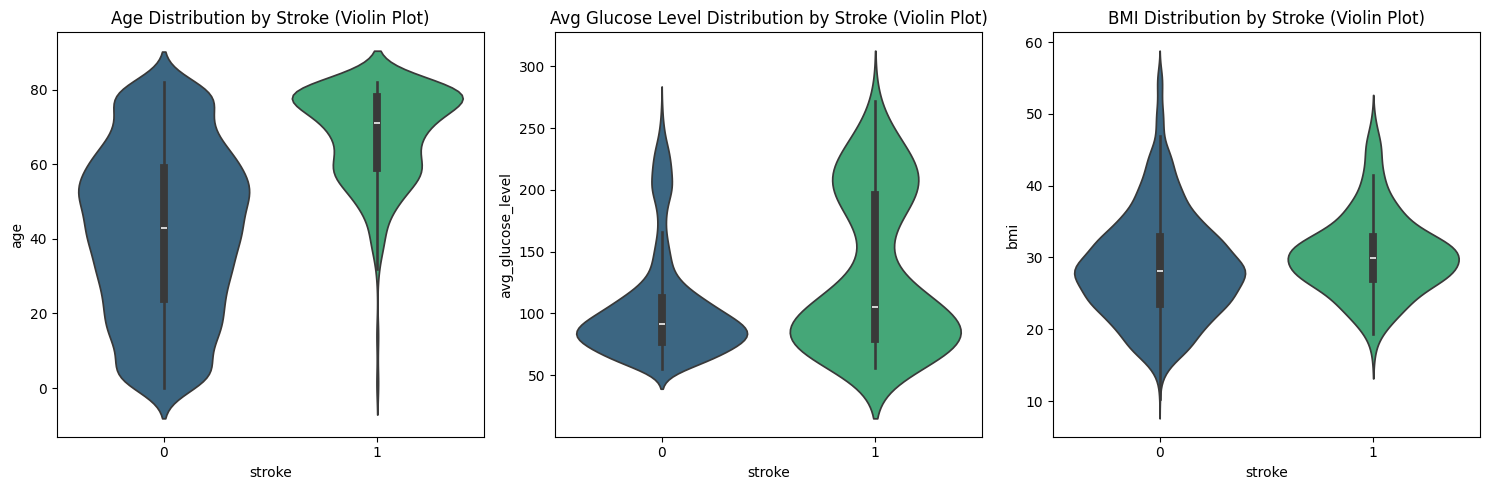

In [146]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x='stroke', y='age', data=df, palette="viridis")
plt.title('Age Distribution by Stroke (Violin Plot)')

plt.subplot(1, 3, 2)
sns.violinplot(x='stroke', y='avg_glucose_level', data=df, palette="viridis")
plt.title('Avg Glucose Level Distribution by Stroke (Violin Plot)')

plt.subplot(1, 3, 3)
sns.violinplot(x='stroke', y='bmi', data=df, palette="viridis")
plt.title('BMI Distribution by Stroke (Violin Plot)')
plt.tight_layout()
plt.show()


###Scatter Plot fro Numerical Features Relationship and Stroke

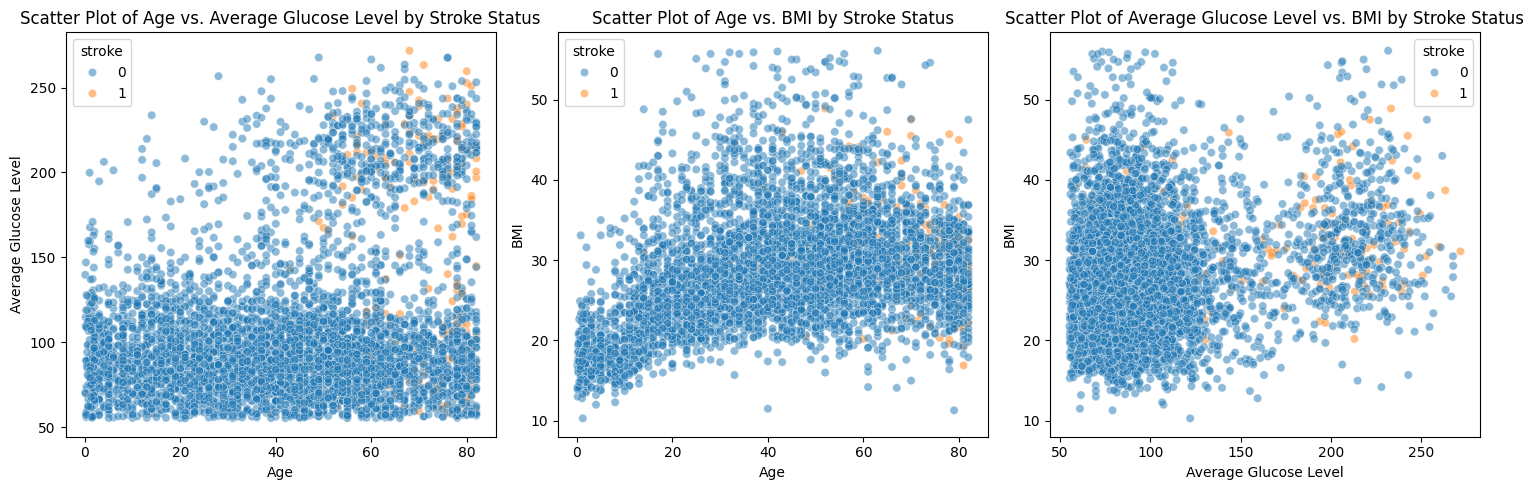

In [147]:

# Scatter Plot 1: Age vs. Average Glucose Level with Stroke Hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', alpha=0.5)
plt.title('Scatter Plot of Age vs. Average Glucose Level by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')

# Scatter Plot 2: Age vs. BMI with Stroke Hue
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', alpha=0.5)
plt.title('Scatter Plot of Age vs. BMI by Stroke Status')
plt.xlabel('Age')
plt.ylabel('BMI')

# Scatter Plot 3: Average Glucose Level vs. BMI with Stroke Hue
plt.subplot(1,3,3)
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke', alpha=0.5)
plt.title('Scatter Plot of Average Glucose Level vs. BMI by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

##Addition Feature Analysis

###Making Categotical Features based on age and visualizing Distribution of different age groups

<ipython-input-148-510014c37cc1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_counts.index,


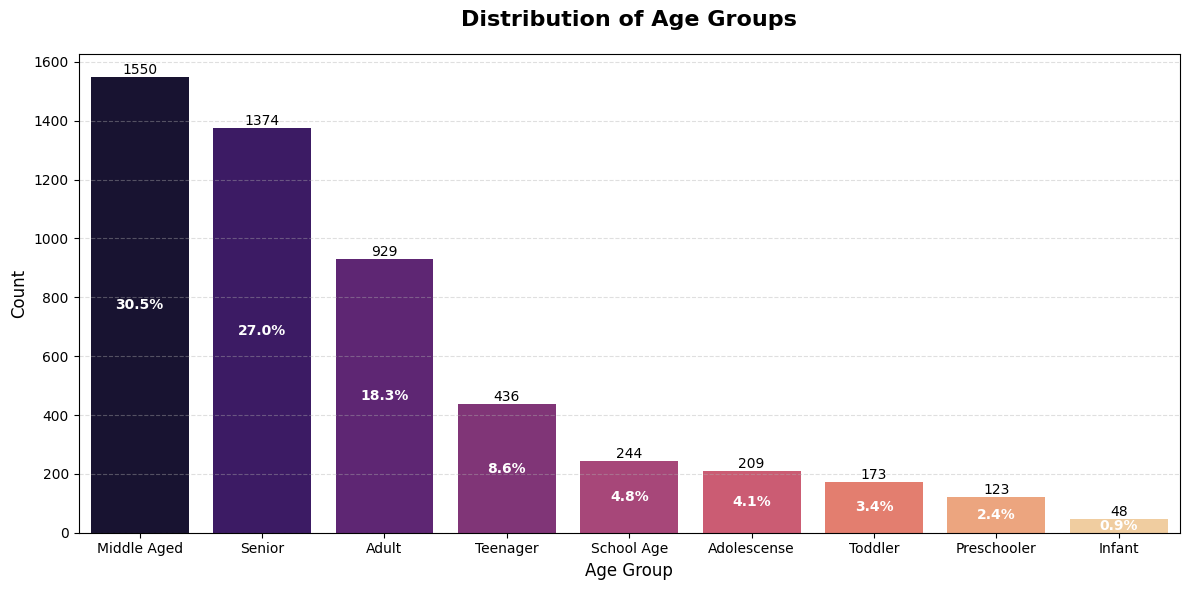

In [148]:

df['Age_Group']= pd.cut(df['age'], bins=[0, 1, 3, 6, 12, 20, 24, 39, 59, float('inf')], labels=['Infant', 'Toddler', 'Preschooler', 'School Age', 'Teenager', 'Adolescense', 'Adult', 'Middle Aged', 'Senior'])



plt.figure(figsize=(12, 6))

age_counts = df['Age_Group'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=age_counts.index,
                 y=age_counts.values,
                 palette='magma' , order=age_counts.index)

plt.title('Distribution of Age Groups', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.4)


total = age_counts.sum()
for i, v in enumerate(age_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%',
            ha='center',
            va='center',
            color='white',
            fontweight='bold')

plt.tight_layout()

plt.show()

###Making categorical feature from BMI and Visualizing Distribution of BMI Categories

###Visualizing Stroke rate based on Age groups

<ipython-input-149-19bd6c10851e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_rate_by_age_group = df.groupby('Age_Group')['stroke'].mean().sort_values(ascending=False)


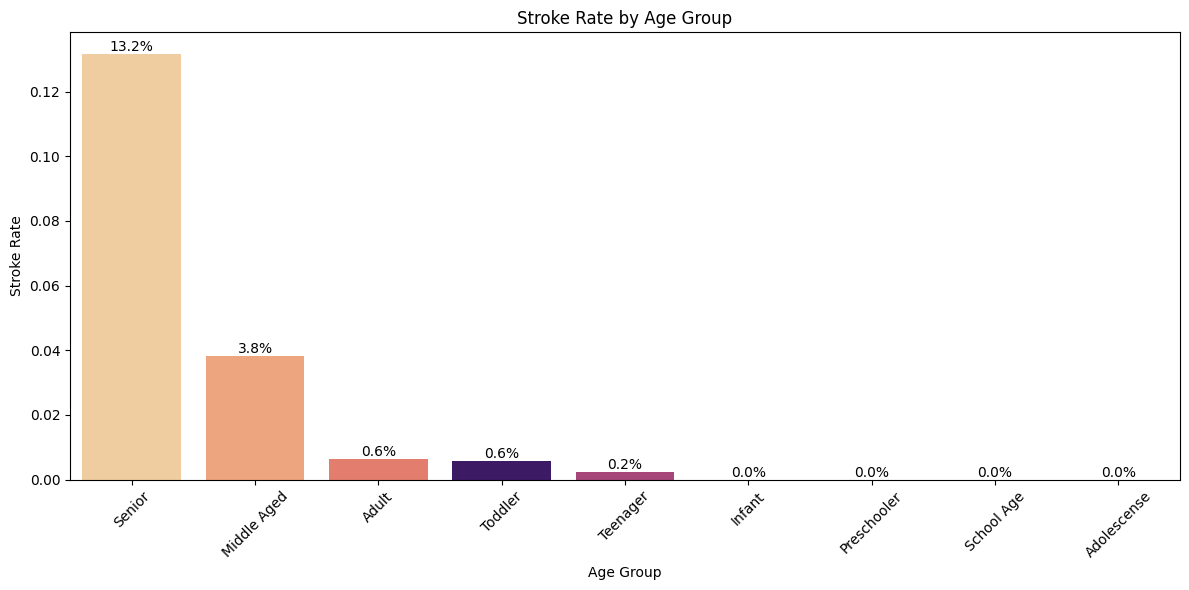

In [149]:

# Calculate stroke rate by Age Group
stroke_rate_by_age_group = df.groupby('Age_Group')['stroke'].mean().sort_values(ascending=False)



plt.figure(figsize=(12, 6))
ax = sns.barplot(x=stroke_rate_by_age_group.index, y=stroke_rate_by_age_group.values, palette='magma', hue=stroke_rate_by_age_group.index, order = stroke_rate_by_age_group.index)
plt.title('Stroke Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=45)


for i, v in enumerate(stroke_rate_by_age_group.values):
    ax.text(i, v, f'{v*100:.1f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()

<ipython-input-150-826bfdf21fc3>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_gender = df.groupby(['BMI Category', 'gender']).size().reset_index(name='Count')


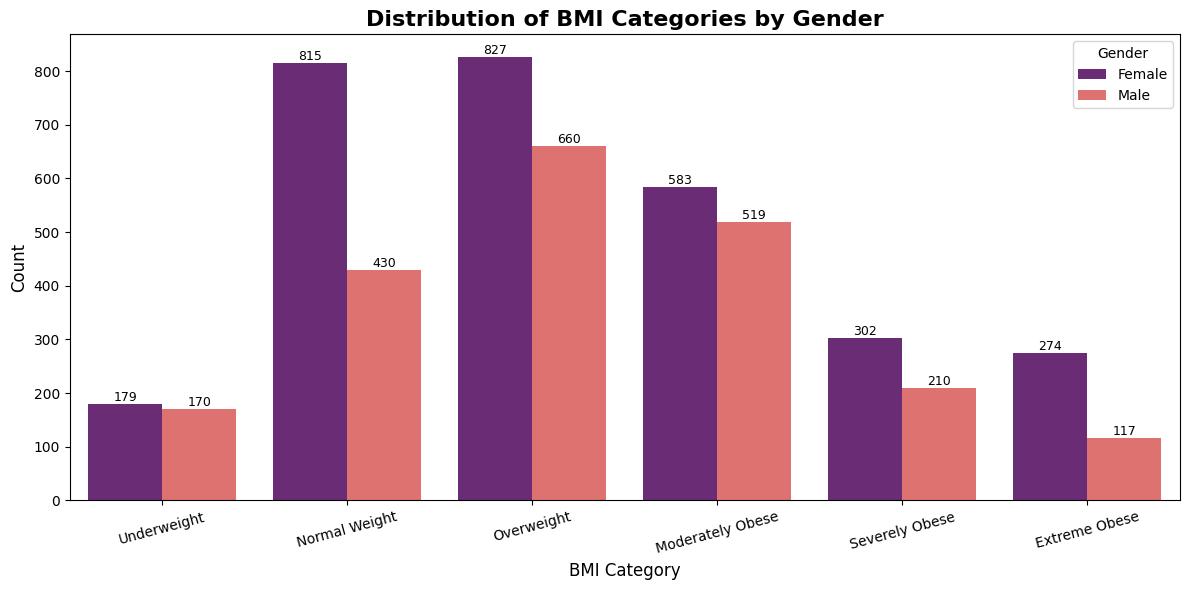

In [150]:
# Bin BMI into categories
df['BMI Category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
    labels=['Underweight', 'Normal Weight', 'Overweight', 'Moderately Obese', 'Severely Obese', 'Extreme Obese']
)

# Count by BMI Category and Gender
bmi_gender = df.groupby(['BMI Category', 'gender']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bmi_gender, x='BMI Category', y='Count', hue='gender', palette='magma')

plt.title('Distribution of BMI Categories by Gender', fontsize=16, fontweight='bold')
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Gender')

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


###Visualizing no. of Stroke Cases based on BMI Category

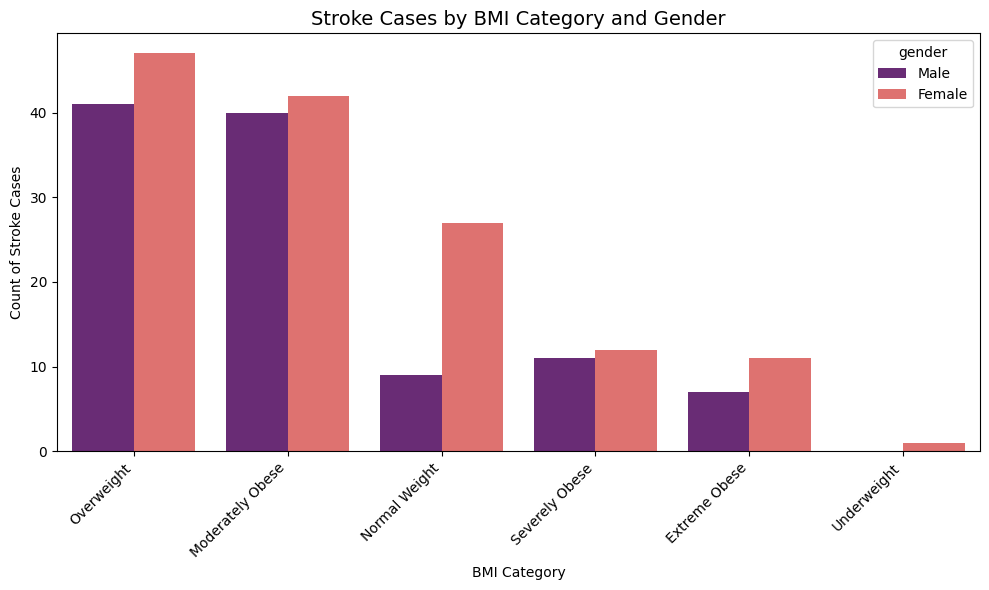

In [151]:
# Filter only stroke cases
df_stroke_1 = df[df['stroke'] == 1].copy()

# Plot count of stroke cases by BMI Category with gender hue
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_stroke_1,
    x='BMI Category',
    hue='gender',
    order=df_stroke_1['BMI Category'].value_counts().index,
    palette='magma'
)

plt.title('Stroke Cases by BMI Category and Gender', fontsize=14)
plt.xlabel('BMI Category')
plt.ylabel('Count of Stroke Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###Proportions of different BMI categories in Stroke cases.

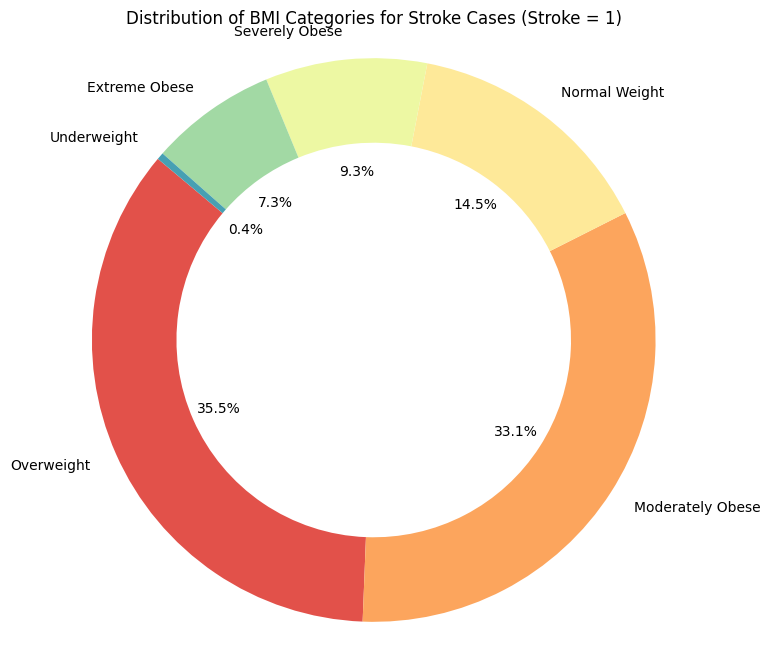

In [152]:

df_stroke_1 = df[df['stroke'] == 1].copy()

# Group by 'BMI Category' and count occurrences for stroke = 1
bmi_stroke_counts = df_stroke_1['BMI Category'].value_counts()

# Create the donut plot
plt.figure(figsize=(8, 8))
plt.pie(bmi_stroke_counts, labels=bmi_stroke_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'), wedgeprops={'width': 0.3})
plt.title('Distribution of BMI Categories for Stroke Cases (Stroke = 1)')


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###Proportions of different Glucose Levels in Stroke cases

<ipython-input-153-efce2571686a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_stroke_one = df[df['stroke'] == 1].groupby('Glucose_Category').size()


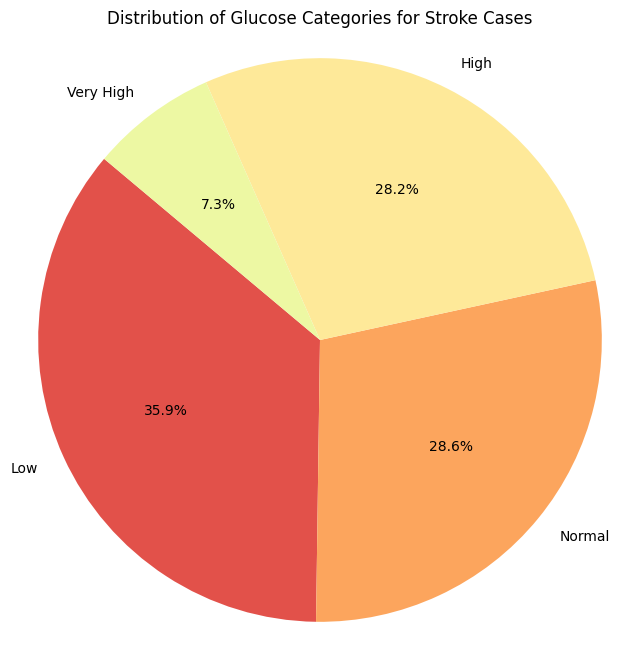

In [153]:
df['Glucose_Category'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

glucose_stroke_one = df[df['stroke'] == 1].groupby('Glucose_Category').size()

plt.figure(figsize=(8, 8))
plt.pie(glucose_stroke_one, labels=glucose_stroke_one.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'))
plt.title('Distribution of Glucose Categories for Stroke Cases')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###Proportions of Smoking Status in Stroke cases

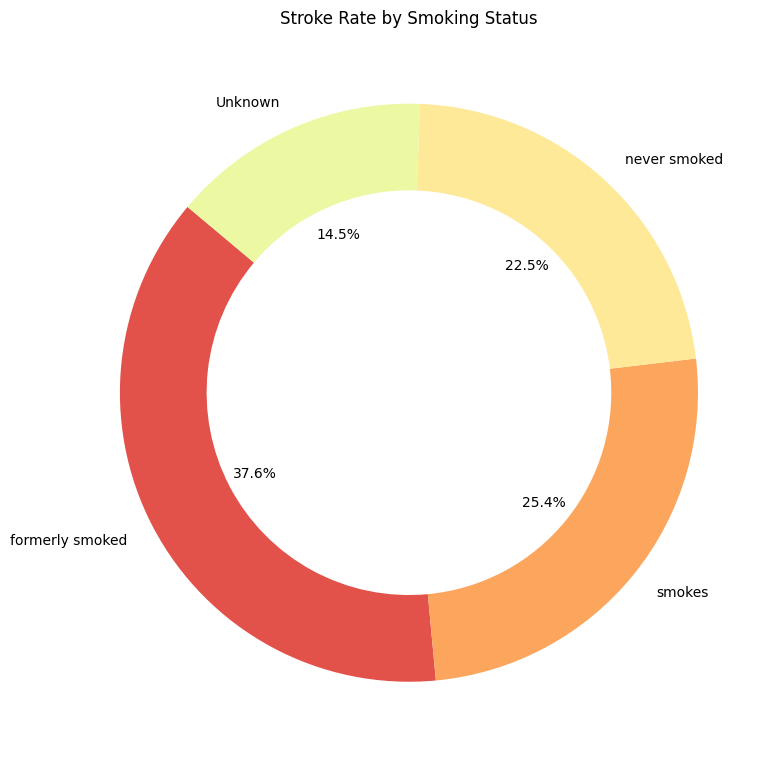

In [154]:

# Analyze stroke rate by smoking status
smoking_status_stroke_rate = df.groupby('smoking_status')['stroke'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,8))

plt.pie(smoking_status_stroke_rate, labels=smoking_status_stroke_rate.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'), wedgeprops= {'width': 0.3})
plt.title('Stroke Rate by Smoking Status')

plt.tight_layout()
plt.show()

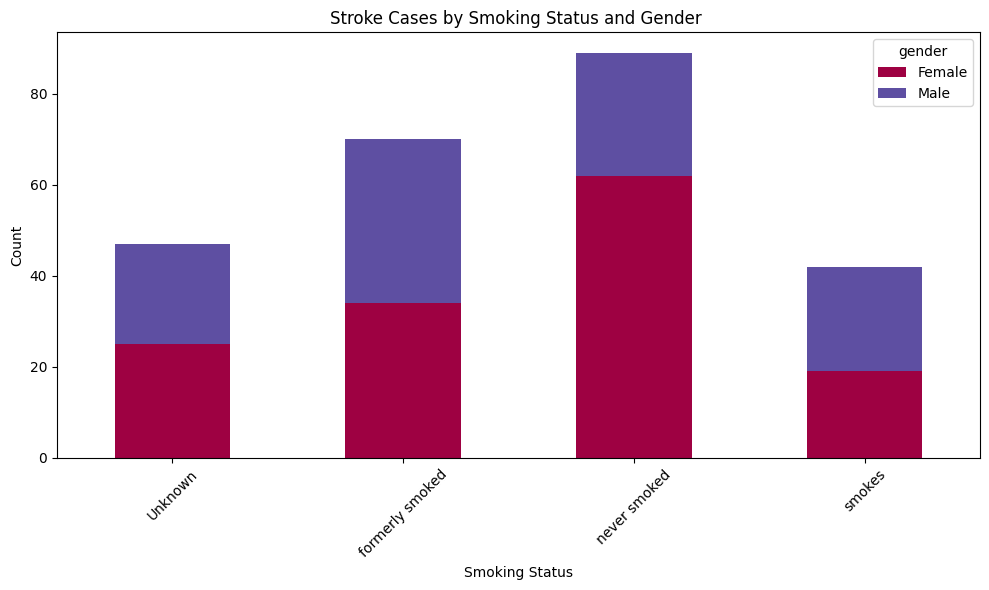

In [155]:
stroke_df = df[df['stroke'] == 1]
counts = stroke_df.groupby(['smoking_status', 'gender']).size().unstack()

counts.plot(
    kind='bar',
    stacked=True,
    colormap='Spectral',
    figsize=(10, 6)
)
plt.title('Stroke Cases by Smoking Status and Gender ')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Visualization of Stroke rate based on Marital Status and Gender

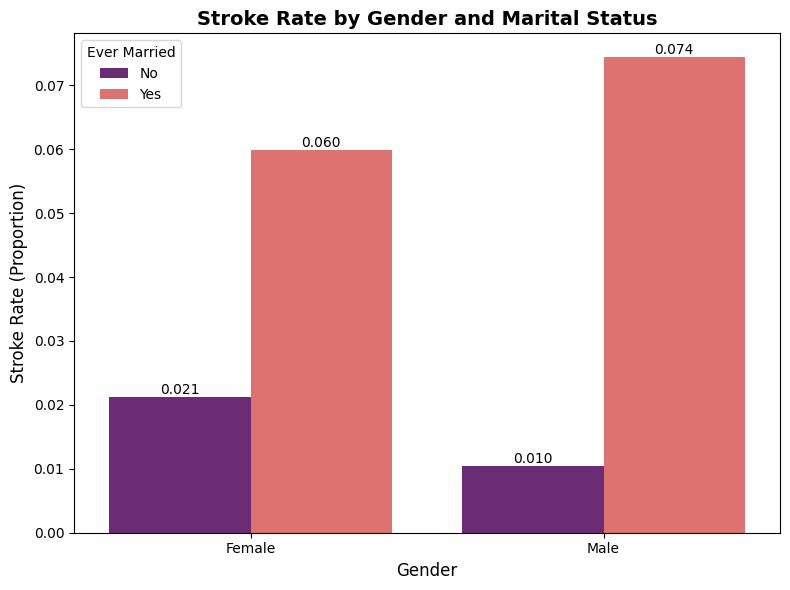

In [156]:
# Grouped mean stroke rates (proportions) by both gender and marital status
combined = df.groupby(['gender', 'ever_married'])['stroke'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=combined, x='gender', y='stroke', hue='ever_married', palette='magma')

plt.title('Stroke Rate by Gender and Marital Status', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Stroke Rate (Proportion)', fontsize=12)

# Annotate bars with stroke rate percentages
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10)

plt.legend(title='Ever Married')
plt.tight_layout()
plt.show()



###Checking Correlation between Married and Non-Married Males and Females fro stroke rates.


Stroke Rate by Gender and Ever Married Status:


ever_married,No,Yes
gender,,
Female,0.021191,0.059829
Male,0.010499,0.074405


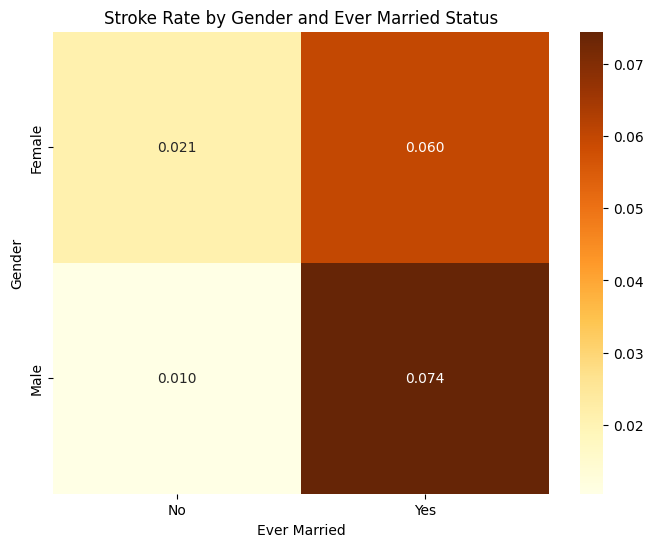

In [157]:

# Analyze correlation between Gender, Ever Married, and Stroke
gender_married_stroke_correlation = df.groupby(['gender', 'ever_married'])['stroke'].mean().unstack()

print("\nStroke Rate by Gender and Ever Married Status:")
display(gender_married_stroke_correlation)

# Visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(gender_married_stroke_correlation, annot=True, cmap='YlOrBr', fmt=".3f")
plt.title('Stroke Rate by Gender and Ever Married Status')
plt.xlabel('Ever Married')
plt.ylabel('Gender')
plt.show()


The visual shows married males having a higher stroke rate. This correlation could be misleading because it doesn't prove causation; other factors like age or lifestyle might explain the link.

This correlation might arise due to uneven distribution of data.

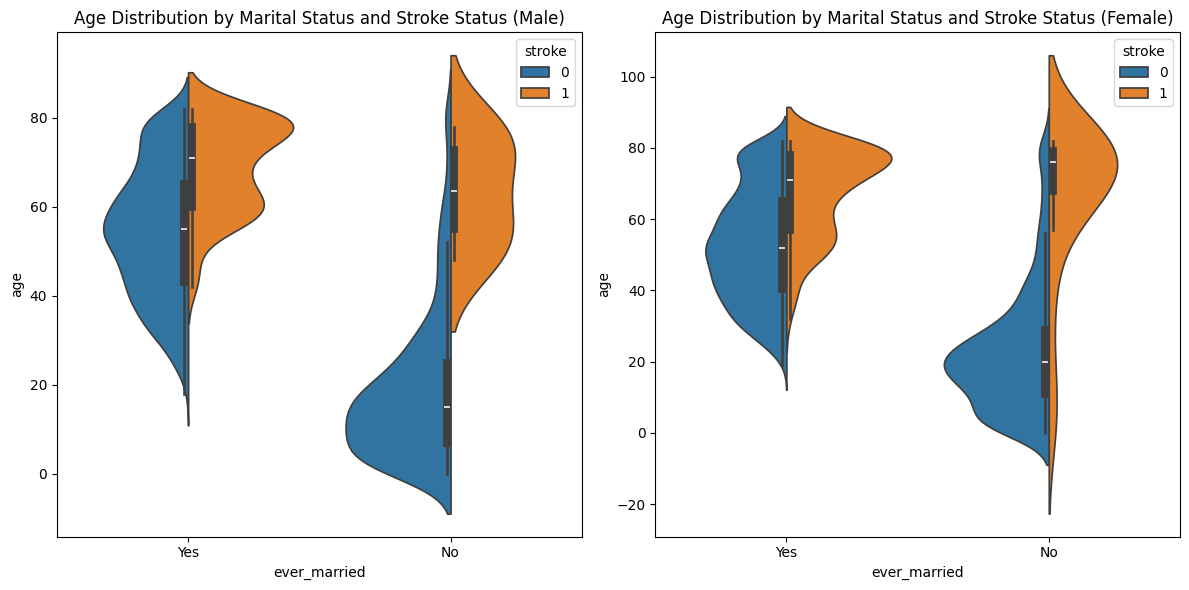

In [158]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(x='ever_married', y='age', hue='stroke', split=True, data=df[df['gender']=='Male'])
plt.title('Age Distribution by Marital Status and Stroke Status (Male)')

plt.subplot(1,2,2)
sns.violinplot(x='ever_married', y='age', hue='stroke', split=True, data=df[df['gender']=='Female'])
plt.title('Age Distribution by Marital Status and Stroke Status (Female)')
plt.tight_layout()
plt.show()


Inference: Plot show similar distrbution of male and female and marital status with age defining the age as factor behind the previous correlation.

**Inferences:**

*   Numerical feature distributions for stroke cases are distinctly different from non-stroke cases (violin plots).
*   Categorical age and BMI analysis clearly shows higher stroke risk in older age groups and higher BMI categories.
*   Higher glucose levels and certain smoking statuses are significantly represented among stroke cases.
*   Stroke rates vary by gender and marital status, with married males showing a higher rate, although this needs careful interpretation.
*   Visualizations collectively reinforce and elaborate on key risk factors identified earlier.

**Interpretations:**

The **violin plots** provide a detailed view of the distribution shapes for numerical features (age, average glucose, BMI) across stroke outcomes. This goes beyond basic summary statistics by showing where the data is most concentrated and the overall spread. For instance, observing a denser area at higher ages for the stroke group visually confirms that age is a significant risk factor.

Analyzing **age and BMI in categories** simplifies understanding by grouping individuals into more intuitive health profiles. Seeing both the *count* and the *rate* of stroke within these categories is crucial. A high *count* in a category means many people in that group have strokes, important for public health. A high *rate* means a high *proportion* of people in that group have strokes, highlighting relative risk. This reinforces that as age and BMI increase, the probability of stroke significantly rises.

The **proportion of stroke cases within glucose level and smoking status categories** using donut plots directly shows which of these subgroups contribute most to the overall stroke population. If, for example, the "Very High Glucose" category accounts for a large slice of the stroke pie, it strongly suggests that managing high glucose is paramount in stroke prevention. Similarly, if smokers or former smokers represent a large proportion, it underscores the importance of addressing smoking habits.

Examining **stroke rates by gender and marital status** highlights demographic differences in risk. The bar plots allow for direct comparison. The heatmap visualizes the combined effect of gender and marital status on stroke rate. While the observation of married males potentially having a higher stroke rate is notable, it's crucial to interpret this cautiously. In an observational dataset like this, marital status is often correlated with age. Since age is a strong stroke risk factor, the apparent link between being married and stroke (especially in males) could be largely driven by the fact that married individuals in the dataset might, on average, be older. So *age* is main factor for bothe gender's stroke rate and marreid as show with violen plot.

In summary, these additional visualizations and analyses move beyond basic correlations to provide a more nuanced understanding of the data. They visually confirm and strengthen the initial findings about age, glucose, BMI, and smoking as major risk factors, while also exploring the influence of demographic factors like gender and marital status.

#Conclusion


**Conclusion:**

This notebook comprehensively explores a healthcare dataset to identify factors associated with stroke risk and builds predictive models.

The **Exploratory Data Analysis** revealed key characteristics of the data, including the presence of missing BMI values and imbalances in certain categorical features. Visualizations highlighted the distributions of numerical and categorical variables and provided initial insights into their relationships with stroke.

The **Data Preprocessing** steps effectively addressed the missing BMI values using regression imputation, a suitable approach given the observed difference in stroke rates for missing vs. available BMI. Outliers in the BMI column were also removed to improve data quality for modeling. Categorical features were appropriately encoded for machine learning.

The **Machine Learning Implementation** compared Logistic Regression, Random Forest, and XGBoost models. Addressing class imbalance with SMOTE on the training data was a crucial step. Based on the evaluation metrics (classification report, confusion matrix, ROC AUC score), the Random Forest Classifier demonstrated superior performance in predicting stroke risk.

Further **Analysis using SHAP** provided valuable insights into the Random Forest model's predictions. The summary plot identified the most important features, confirming the significance of age, average glucose level, and BMI. Dependence plots illustrated complex interactions between features, highlighting how the impact of one variable on stroke prediction can change based on another.

The **Additional Data Analysis and Visualization** section deepened the understanding of the data and model findings. Violin plots provided richer detail on numerical feature distributions by stroke status. Categorical analysis of age and BMI clearly showed increasing stroke risk with age and higher BMI. Proportional analyses of glucose levels and smoking status in stroke cases emphasized their importance as risk factors. The analysis of stroke rates by gender and marital status, while revealing potential differences, also highlighted the need for cautious interpretation due to possible confounding factors like age.

In conclusion, this analysis successfully identified significant risk factors for stroke, including age, average glucose level, BMI, certain smoking statuses, and hypertension. The Random Forest model, trained on preprocessed and balanced data, demonstrated good performance in predicting stroke risk, and SHAP analysis provided valuable interpretability of its predictions. The findings from this study can inform further investigations, risk assessment tools, and targeted interventions aimed at reducing stroke incidence.